In [13]:
#Importando librerías
import numpy as np
import matplotlib.pyplot as plt

# Caída libre desde el reposo

Sea una partícula de masa $m$ que se libera desde el reposo desde una altura inicial $y_0=100$ m. En ausencia de fuerzas disipativas, las siguientes son las ecuaciones cinemáticas del movimiento:

$$ y=-\frac{g}{2}t^2 + 100 \\ v_y=-gt \\ a_y = -g$$

In [14]:
#Algunas constantes
g=9.8
y0=100
t_end=np.sqrt(2*y0/g)

#La función posición 
def Y(x):
    g=9.8
    y0=100
    y=-0.5*g*x*x+y0
    return y

#La función velocidad
def V(x):
    g=9.8
    v=-g*x
    return v

Se debe tener una lista de datos (tiempo, x_list) con espaciamiento constante y una función donde evaluarla (posición respecto al tiempo), los resutados de esta función serán la otra lista ( y_list) que estara en terminos de la primera lista, es decir,

y_list = F (x_list(tiempo)) 

In [15]:
#Generar una lista de variables independientes CON ESPACIAMIENTO CONSTANTE
time=np.linspace(0,t_end,100)

#Valores experimentales
x_list=time
y_list=Y(x_list)

#La función aceleración
A=[]
for i in range(0,len(x_list)):
    A.append(-9.8)

In [16]:
#La función primera derivada 
def dydx(x_list,y_list):
    
    #Calcular valor de h
    h=x_list[1]-x_list[0]
    
    #Creamos lista vacia para almacenar las derivadas
    dydx_list=[]
    
    for i in range(0,len(x_list)):
        # Usar diferencia hacia adelante
        if i==0:
            f0=y_list[i]
            f1=y_list[i+1]
            f2=y_list[i+2]
            value=0.5/h*(-3*f0+4*f1-f2)
        elif i==len(x_list)-1:
            f0=y_list[i-2]
            f1=y_list[i-1]
            f2=y_list[i]
            value=0.5/h*(f0-4*f1+3*f2)
        else:
            f0=y_list[i-1]
            f1=y_list[i]
            f2=y_list[i+1]
            value=0.5/h*(f2-f0)
            
        dydx_list.append(value)
        
    return dydx_list
            

#La función segunda derivada 
def ddyddx(x_list,y_list):
    
    #Calcular valor de h
    h=x_list[1]-x_list[0]
    
    #Creamos lista vacia para almacenar las derivadas
    ddyddx_list=[]
    
    for i in range(0,len(x_list)):
        # Usar diferencia hacia adelante
        if i==0:
            f0=y_list[i]
            f1=y_list[i+1]
            f2=y_list[i+2]
            value=1/(h*h)*(f0-2*f1+f2)
        elif i==len(x_list)-1:
            f0=y_list[i-2]
            f1=y_list[i-1]
            f2=y_list[i]
            value=1/(h*h)*(f0-2*f1+f2)
        else:
            f0=y_list[i-1]
            f1=y_list[i]
            f2=y_list[i+1]
            value=1/(h*h)*(f0-2*f1+f2)
            
        ddyddx_list.append(value)
        
    return ddyddx_list

Text(0,0.5,'a_y')

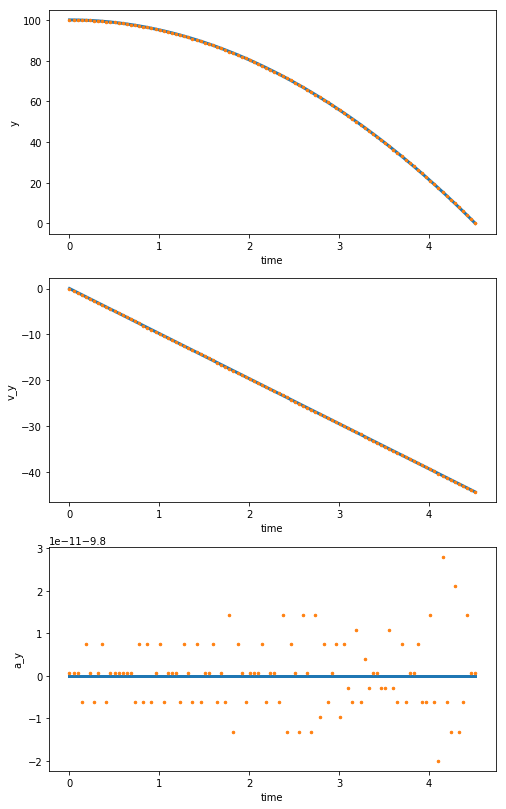

In [17]:
#Graficación

fig, (ax_1, ax_2, ax_3) = plt.subplots(3, 1,figsize=(8,14))
ax_1.plot(time,Y(time),linewidth=3)
ax_1.plot(time,y_list,'.',markersize=5)
ax_1.set_xlabel('time')
ax_1.set_ylabel('y')

ax_2.plot(time,V(time),linewidth=3)
ax_2.plot(time,dydx(x_list,y_list),'.',markersize=5)
ax_2.set_xlabel('time')
ax_2.set_ylabel('v_y')

ax_3.plot(time,A,linewidth=3)
ax_3.plot(time,ddyddx(x_list,y_list),'.',markersize=5)
ax_3.set_xlabel('time')
ax_3.set_ylabel('a_y')